In [288]:
from Basics import *
setplot(dark=True)

initpar = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76, "T_CMB":2.725}

cosmology = astropy.cosmology.LambdaCDM(H0=initpar["hh"]*100, Tcmb0=2.726, Om0=initpar["Omega_m"], Ode0=initpar["Omega_L"], Ob0=initpar["Omega_b"])
H_func = lambda z: cosmology.H(z).to(u.km/u.s/u.Mpc).value
rhoc_func = lambda z: cosmology.critical_density(z).to(u.Msun/u.Mpc**3).value
dA_func = lambda z: cosmology.angular_diameter_distance(z).value
r200c_func = lambda z, logm200c: (10**logm200c/(4/3*np.pi*200*rhoc_func(z[:, None])))**(1/3)

# Stellar-Halo Mass Relations

In [270]:
import Models.SHMRs as SHMRs
del sys.modules['Models.SHMRs']  # Clear the cache to avoid conflicts
import Models.SHMRs as SHMRs

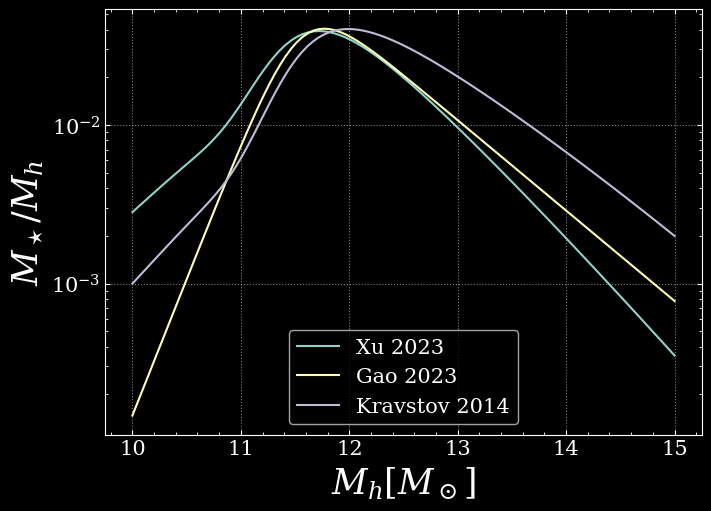

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), layout='constrained')
ax.set(ylabel=r'$M_\star / M_h$', xlabel=r'$M_h [M_\odot]$', yscale='log')

loghalos = np.linspace(10, 15, 100)

Xu = SHMRs.Xu2023({'sample':'Main_BP13'})
ax.plot(loghalos, 10**Xu.HSMR(loghalos)/10**loghalos, label='Xu 2023')
Gao = SHMRs.Gao2023({'sample': 'ELG_Auto'})
ax.plot(loghalos, 10**Gao.HSMR(loghalos)/10**loghalos, label='Gao 2023')
Kravstov = SHMRs.Kravstov2014({'sample':'Mvir'})
ax.plot(loghalos, 10**Kravstov.HSMR(loghalos)/10**loghalos, label='Kravstov 2014')

ax.legend(); plt.show()

# Halo Occupancy Distributions

In [276]:
import Models.HODs as HODs
del sys.modules['Models.HODs']  # Clear the cache to avoid conflicts
import Models.HODs

/global/u2/c/cpopik/Capybara/Models/HODs.py:27: RuntimeWarning: invalid value encountered in power
  return ((M-M_0)/M_1)**alpha


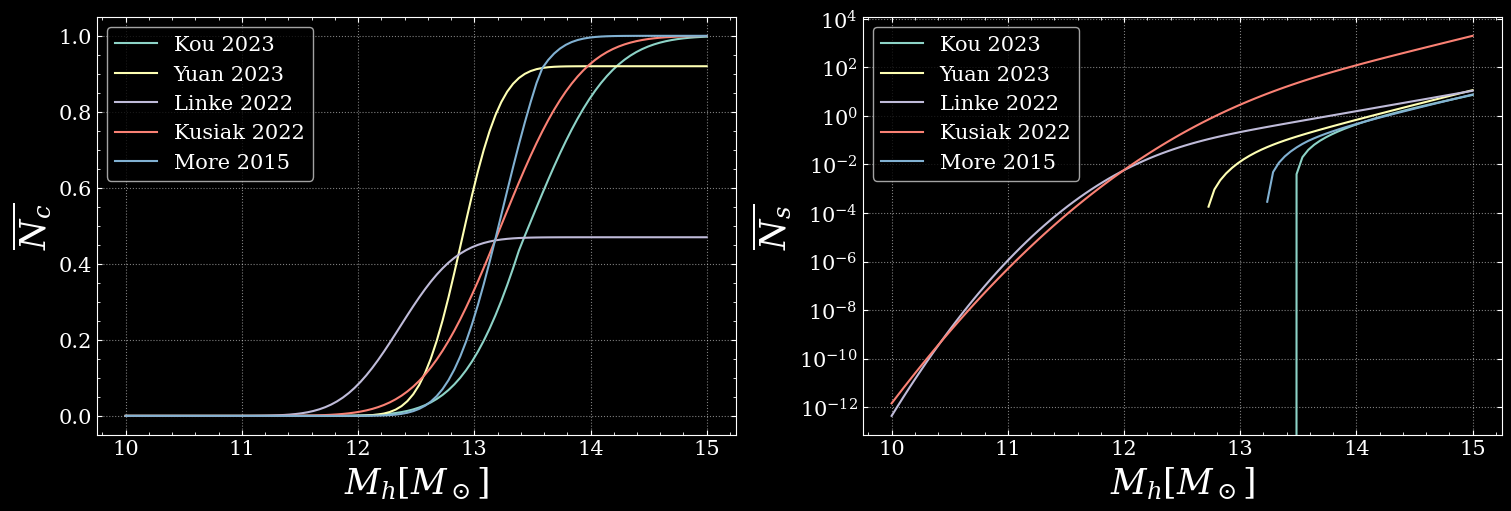

In [277]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(ylabel=r'$\overline{N_c}$', xlabel=r'$M_h [M_\odot]$')
axs[1].set(ylabel=r'$\overline{N_s}$', xlabel=r'$M_h [M_\odot]$', yscale='log')

loghalos = np.linspace(10, 15, 100)

Kou = HODs.Kou2023({'sample':'M*>10.8'})
axs[0].plot(loghalos, Kou.Nc(loghalos), label='Kou 2023')
axs[1].plot(loghalos, Kou.Ns(loghalos), label='Kou 2023')

Yuan = HODs.Yuan2023({'sample':"LRG 0.4<z<0.6"})
axs[0].plot(loghalos, Yuan.Nc(loghalos), label='Yuan 2023')
axs[1].plot(loghalos, Yuan.Ns(loghalos), label='Yuan 2023')

Linke = HODs.Linke2022({'sample':'MS red'})
axs[0].plot(loghalos, Linke.Nc(loghalos), label='Linke 2022')
axs[1].plot(loghalos, Linke.Ns(loghalos), label='Linke 2022')

Kusiak = HODs.Kusiak2022({'sample':'Red'})
axs[0].plot(loghalos, Kusiak.Nc(loghalos), label='Kusiak 2022')
axs[1].plot(loghalos, Kusiak.Ns(loghalos), label='Kusiak 2022')

More = HODs.More2015({'sample':'[11.10, 12.00]'})
axs[0].plot(loghalos, More.Nc(loghalos), label='More 2015')
axs[1].plot(loghalos, More.Ns(loghalos), label='More 2015')

axs[0].legend(), axs[1].legend(); plt.show()

# Halo Mass Functions

In [278]:
import Models.HMFs as HMFs
del sys.modules['Models.HMFs']  # Clear the cache to avoid conflicts
import Models.HMFs as HMFs

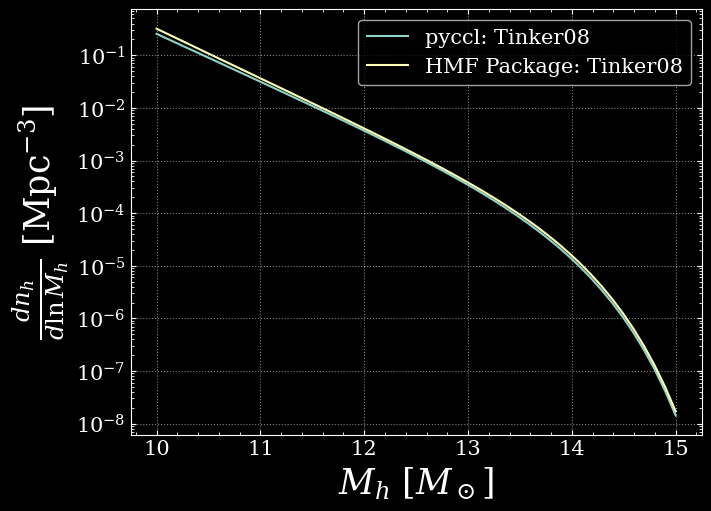

In [279]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), layout='constrained')
ax.set(ylabel=r'$\frac{dn_h}{d\ln M_h}$ [Mpc$^{-3}$]', xlabel=r'$M_h \ [M_\odot]$', yscale='log')

logmshalo = np.linspace(10, 15, 50)
zs = np.linspace(0.4, 1.1, 10)

hmfccl = HMFs.pyccl({'mdef':'200c', 'mfunc':'Tinker08', 'hbias':'Tinker10'})
plt.plot(logmshalo, hmfccl.HMF(zs, logmshalo, **initpar)[5], label='pyccl: Tinker08')

hmfpack = HMFs.hmf_package({'mfunc':'Tinker08', 'mdef':'SOCritical'})
plt.plot(logmshalo, hmfpack.HMF(zs, logmshalo, **initpar)[5], label='HMF Package: Tinker08')

ax.legend(); plt.show()

# Stellar Mass Functions & Redshift Distributions

In [316]:
import Models.SMFs as SMFs
del sys.modules['Models.SMFs']  # Clear the cache to avoid conflicts
import Models.SMFs as SMFs

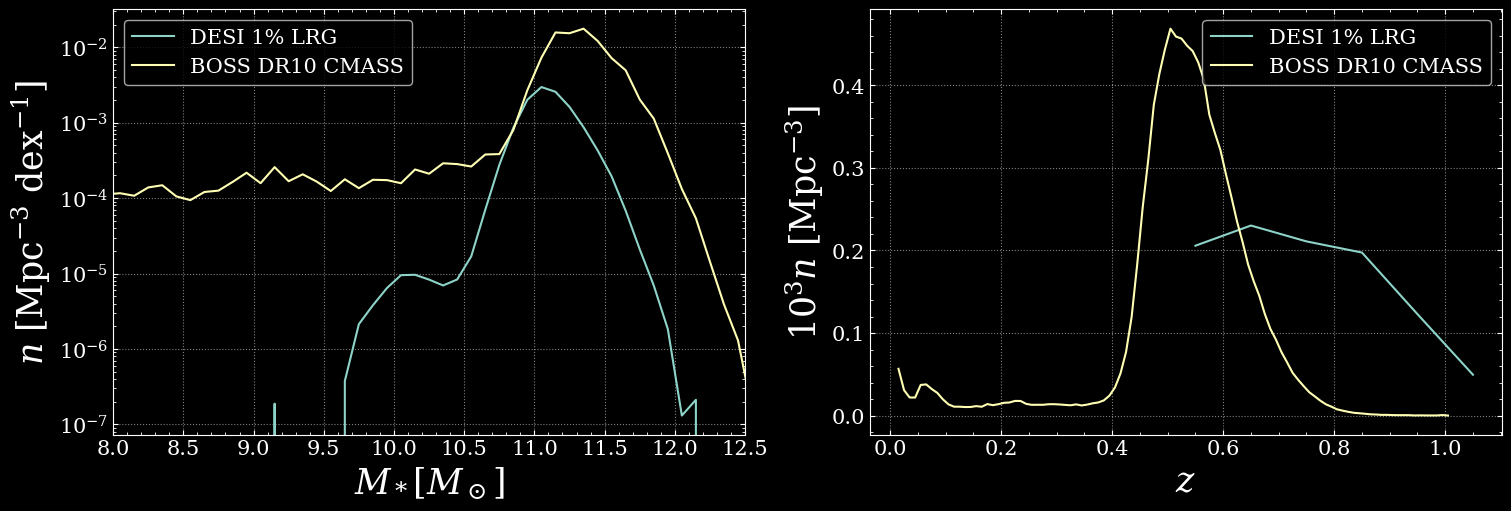

In [317]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(xlabel=r'$M_* [M_\odot]$', ylabel=r'$n$ [Mpc$^{-3}$ dex$^{-1}$]', yscale='log', xlim=(8, 12.5))
axs[1].set(xlabel=r'$z$', ylabel=r'$10^3 n$ [Mpc$^{-3}$]')

desi = SMFs.DESI1Percent({'sample':'LRG', 'hemisphere':'combined'})
axs[0].plot(desi.logmstar, np.sum(desi.dndlogmstar(**initpar), axis=0), label='DESI 1% LRG')
axs[1].plot(desi.z[1:], np.trapz(desi.dndlogmstar(**initpar)[1:], desi.logmstar)*1e3, label='DESI 1% LRG')

cmass = SMFs.DR10CMASS({'group':'portsmouth', 'template':'passive', 'IMF':'krou'})
axs[0].plot(cmass.logmstar, np.sum(cmass.dndlogmstar(**initpar), axis=0), label='BOSS DR10 CMASS')
axs[1].plot(cmass.z[1:], np.trapz(cmass.dndlogmstar(**initpar)[1:], cmass.logmstar)*1e3, label='BOSS DR10 CMASS')

axs[0].legend(), axs[1].legend(); plt.show()

# Profiles

In [293]:
import Models.Profiles as Profiles
del sys.modules['Models.Profiles']  # Clear the cache to avoid conflicts
import Models.Profiles as Profiles

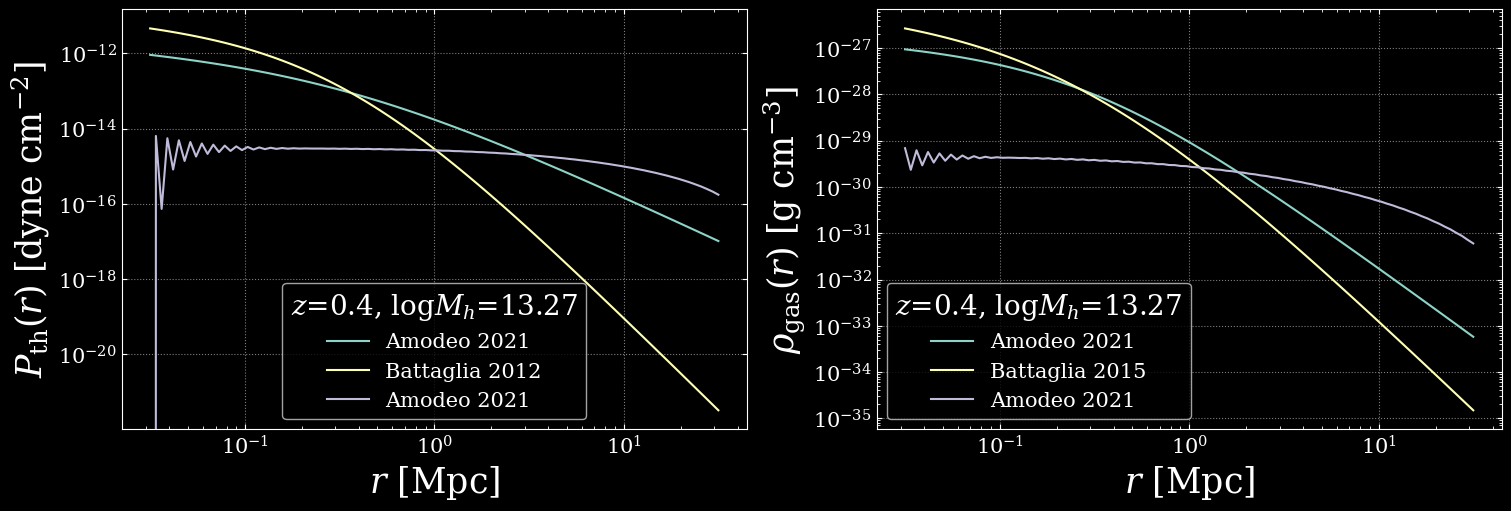

In [303]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(ylabel=r'$P_\text{th}(r)$ [dyne cm$^{-2}$]', xlabel=r'$r$ [Mpc]')
axs[1].set(ylabel=r'$\rho_\text{gas}(r)$ [g cm$^{-3}]$', xlabel=r'$r$ [Mpc]')

rs = np.logspace(-1.5, 1.5, 100)
logmshalo = np.linspace(10, 14, 50)
zs = np.linspace(0.4, 1.1, 10)

AmodeoPth = Profiles.Amodeo2021({'model':'GNFW'}).Pth1h(rs, zs, logmshalo, rhoc_func, r200c_func, **initpar)
Amodeorho = Profiles.Amodeo2021({'model':'GNFW'}).rho1h(rs, zs, logmshalo, rhoc_func, r200c_func, **initpar)
axs[0].loglog(rs, AmodeoPth()[:, 0, 40], label='Amodeo 2021')
axs[1].loglog(rs, Amodeorho()[:, 0, 40], label='Amodeo 2021')

Battaglia2012 = Profiles.Battaglia2012({'model':'B12'}).Pth1h(rs, zs, logmshalo, rhoc_func, r200c_func, **initpar)
axs[0].loglog(rs, Battaglia2012()[:, 0, 40], label='Battaglia 2012')
Battaglia2015 = Profiles.Battaglia2015({'model':'AGN'}).rho1h(rs, zs, logmshalo, rhoc_func, r200c_func, **initpar)
axs[1].loglog(rs, Battaglia2015()[:, 0, 40], label='Battaglia 2015')

hmfccl = HMFs.pyccl({'mdef':'200c', 'mfunc':'Tinker08', 'hbias':'Tinker10'})
AmodeoPth2h = Profiles.Amodeo2021({'model':'GNFW'}).Pth2h(rs, zs, logmshalo, rhoc_func, r200c_func, hmfccl.Plin, hmfccl.bh, hmfccl.HMF,**initpar)
axs[0].loglog(rs, AmodeoPth2h()[:, 0, 40], label='Amodeo 2021')
Amodeorho2h = Profiles.Amodeo2021({'model':'GNFW'}).rho2h(rs, zs, logmshalo, rhoc_func, r200c_func, hmfccl.Plin, hmfccl.bh, hmfccl.HMF,**initpar)
axs[1].loglog(rs, Amodeorho2h()[:, 0, 40], label='Amodeo 2021')


axs[0].legend(title=f'$z$={zs[0]}, log$M_h$={logmshalo[40]:.2f}')
axs[1].legend(title=f'$z$={zs[0]}, log$M_h$={logmshalo[40]:.2f}')
plt.show()

# Measurements

In [15]:
import Models.Measurements as Measurements
del sys.modules['Models.Measurements']  # Clear the cache to avoid conflicts
import Models.Measurements as Measurements

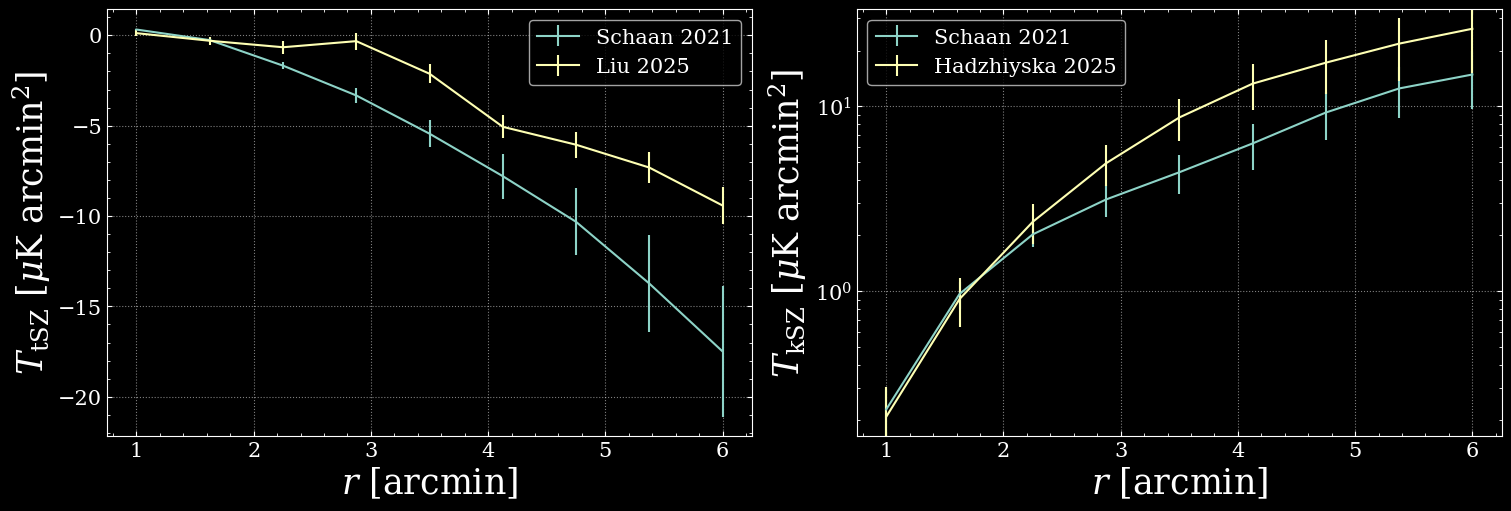

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(xlabel=r'$r$ [arcmin]', ylabel=r'$T_\text{tSZ}$ [$\mu$K arcmin$^2$]')
axs[1].set(xlabel=r'$r$ [arcmin]', ylabel=r'$T_\text{kSZ}$ [$\mu$K arcmin$^2$]', yscale='log')

Schaan2021 = Measurements.Schaan2021({})
axs[0].errorbar(Schaan2021.thetas, Schaan2021.tSZdata, np.diag(Schaan2021.tSZcov)**0.5, label='Schaan 2021')
axs[1].errorbar(Schaan2021.thetas, Schaan2021.kSZdata, np.diag(Schaan2021.kSZcov)**0.5, label='Schaan 2021')

Liu2025 = Measurements.Liu2025({'zbin':'2', 'dBeta':'1.2'})
Liu2025.tSZdata_in_muK(T_CMB=2.725)
axs[0].errorbar(Liu2025.thetas, Liu2025.tSZdata, np.diag(Liu2025.tSZcov)**0.5, label='Liu 2025')

Hadzhiyska2025 = Measurements.Hadzhiyska2025({'zbin':'1', 'sample':'main', 'corr':'uncorrected', 'zoutcut':'nocut'})
axs[1].errorbar(Hadzhiyska2025.thetas, Hadzhiyska2025.kSZdata, np.diag(Hadzhiyska2025.kSZcov)**0.5, label='Hadzhiyska 2025')

axs[0].legend(), axs[1].legend(); plt.show()